Gradient Descent Optimum: 1.0 Stopped after 2497 iterations
Newton's Method Optimum: 0.9999999996183471 Stopped after 37 iterations


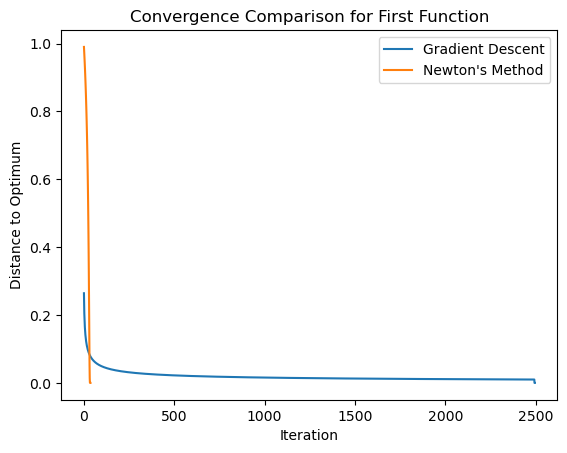

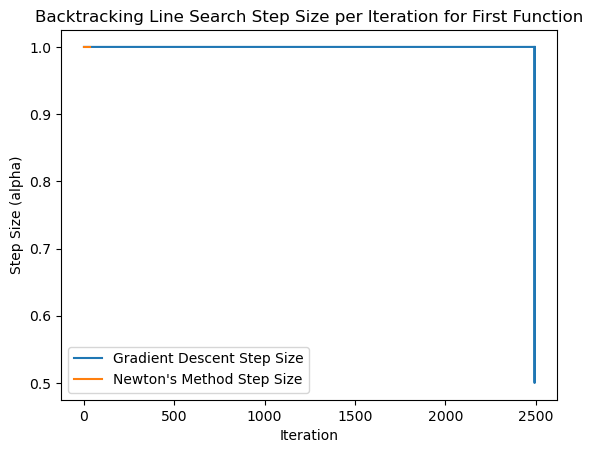

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Backtracking line search parameters
alpha = 1.0
beta = 0.5
c = 1e-4

# Define the function, gradient, and Hessian for the first function
def f1(x):
    return -np.exp(-(x - 1)**2)

def g1(x):
    return 2 * (x - 1) * np.exp(-(x - 1)**2)

def h1(x):
    return 2 * np.exp(-(x - 1)*2) - 4 * (x - 1)*2 * np.exp(-(x - 1)*2)

# Backtracking line search function
def line_search(x, p, grad, func):
    alpha_new = alpha
    while func(x + alpha_new * p) > func(x) + c * alpha_new * grad * p:
        alpha_new *= beta
    return alpha_new

# Gradient Descent for the first function
def gradient_descent(func, grad, x0, tol=1e-6, max_iter=3000):
    x = x0
    optimum_distance = []
    steps = []
    for i in range(max_iter):
        grad_x = grad(x)
        alpha_new = line_search(x, -grad_x, grad_x, func)
        x = x - alpha_new * grad_x
        distance_to_optimum = abs(x - 1)  # Track distance to the optimum
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Newton's Method for the first function with regularization
def newtons_method(func, grad, hess, x0, tol=1e-6, max_iter=3000):
    x = x0
    optimum_distance = []
    steps = []
    for i in range(max_iter):
        grad_x = grad(x)
        hess_x = hess(x) + 1e-2  # Regularize to ensure positive-definiteness
        step = -grad_x / hess_x
        alpha_new = line_search(x, step, grad_x, func)
        x = x + alpha_new * step
        distance_to_optimum = abs(x - 1)  # Track distance to the optimum 
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Initial conditions and run the methods
x0 = 0
gd_result, gd_optimum_distance, gd_steps = gradient_descent(f1, g1, x0)
newton_result, newton_optimum_distance, newton_steps = newtons_method(f1, g1, h1, x0)

# Print results and stopping criteria
print("Gradient Descent Optimum:", gd_result, "Stopped after", len(gd_optimum_distance), "iterations")
print("Newton's Method Optimum:", newton_result, "Stopped after", len(newton_optimum_distance), "iterations")

# Plotting convergence (distance to optimum)
plt.plot(gd_optimum_distance, label='Gradient Descent')
plt.plot(newton_optimum_distance, label='Newton\'s Method')
plt.xlabel('Iteration')
plt.ylabel('Distance to Optimum')
plt.legend()
plt.title('Convergence Comparison for First Function')
plt.show()

# Plotting step sizes from backtracking line search
plt.plot(gd_steps, label='Gradient Descent Step Size')
plt.plot(newton_steps, label='Newton\'s Method Step Size')
plt.xlabel('Iteration')
plt.ylabel('Step Size (alpha)')
plt.legend()
plt.title('Backtracking Line Search Step Size per Iteration for First Function')
plt.show()

Gradient Descent Optimum: [1.00261283 1.00523412] Stopped after 3000 iterations
Newton's Method Optimum: [1. 1.] Stopped after 9 iterations


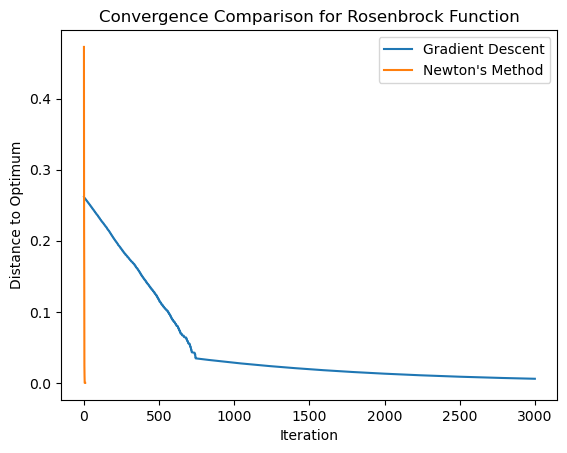

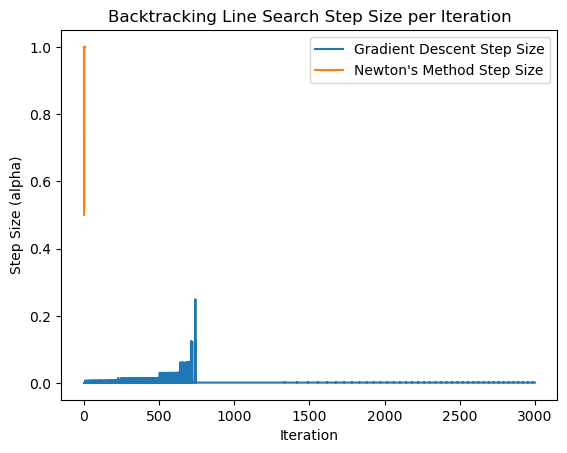

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function, gradient, and Hessian for Rosenbrock function
def f2(x):
    # Rosenbrock function: (1 - x)^2 + 100 * (y - x^2)^2
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def g2(x):
    # Gradient of Rosenbrock function
    dfdx = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
    dfdy = 200 * (x[1] - x[0]**2)
    return np.array([dfdx, dfdy])

def h2(x):
    # Hessian of Rosenbrock function
    d2fdx2 = 2 - 400 * (x[1] - 3 * x[0]**2)
    d2fdxdy = -400 * x[0]
    d2fdydx = -400 * x[0]
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdydx, d2fdy2]])

# Backtracking line search function (modified to return step sizes)
def line_search(x, p, grad, func):
    alpha_new = alpha
    while func(x + alpha_new * p) > func(x) + c * alpha_new * grad @ p:
        alpha_new *= rho
    return alpha_new

# Gradient Descent with tracking of step size and distance to optimum
def gradient_descent(func, grad, hess, x0, tol=1e-6, max_iter=3000):
    x = x0
    optimum_distance = []
    steps = []
    for i in range(max_iter):
        grad_x = grad(x)
        hess_x = hess(x)
        # Ensure positive-definite Hessian by regularizing if needed
        eigvals = np.linalg.eigvals(hess_x)
        if np.any(eigvals <= 0):
            hess_x += 1e-7 * np.eye(len(x))
        alpha_new = line_search(x, -grad_x, grad_x, func)
        x = x - alpha_new * grad_x
        distance_to_optimum = np.linalg.norm(x - np.array([1, 1]))  # distance to assumed optimum (1,1)
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Newton's Method with tracking of step size and distance to optimum
def newtons_method(func, grad, hess, x0, tol=1e-6, max_iter=3000):
    x = x0
    optimum_distance = []
    steps = []
    for i in range(max_iter):
        grad_x = grad(x)
        hess_x = hess(x)

        # Ensure positive-definite Hessian by regularizing if needed
        eigvals = np.linalg.eigvals(hess_x)
        if np.any(eigvals <= 0):
            hess_x += 1e-7 * np.eye(len(x))  # Regularize Hessian if not positive definite

        step = np.linalg.solve(hess_x, -grad_x)
        alpha_new = line_search(x, step, grad_x, func)
        x = x + alpha_new * step
        distance_to_optimum = np.linalg.norm(x - np.array([1, 1]))  # distance to assumed optimum (1,1)
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Initial conditions and run the methods
x0 = np.array([1.2, 1.2])
gd_result, gd_optimum_distance, gd_steps = gradient_descent(f2, g2, h2, x0)
newton_result, newton_optimum_distance, newton_steps = newtons_method(f2, g2, h2, x0)

# Print results and stopping criteria
print("Gradient Descent Optimum:", gd_result, "Stopped after", len(gd_optimum_distance), "iterations")
print("Newton's Method Optimum:", newton_result, "Stopped after", len(newton_optimum_distance), "iterations")

# Plotting distance to optimum (convergence)
plt.plot(gd_optimum_distance, label='Gradient Descent')
plt.plot(newton_optimum_distance, label='Newton\'s Method')
plt.xlabel('Iteration')
plt.ylabel('Distance to Optimum')
plt.legend()
plt.title('Convergence Comparison for Rosenbrock Function')
plt.show()

# Plotting step sizes from backtracking line search
plt.plot(gd_steps, label='Gradient Descent Step Size')
plt.plot(newton_steps, label='Newton\'s Method Step Size')
plt.xlabel('Iteration')
plt.ylabel('Step Size (alpha)')
plt.legend()
plt.title('Backtracking Line Search Step Size per Iteration')
plt.show()



Gradient Descent Optimum: [ 0.25 -0.25] Stopped after 3 iterations
Newton's Method Optimum: [ 0.25 -0.25] Stopped after 2 iterations


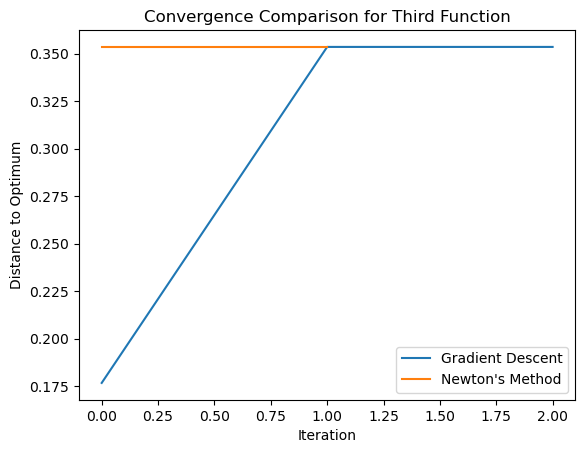

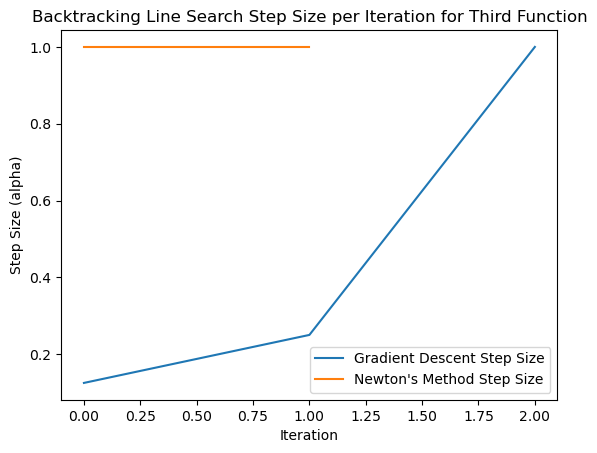

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Backtracking line search parameters
alpha, rho, c = 1.0, 0.5, 1e-4

# Define the matrix A and vector b
A = np.array([[3, 1], [1, 3]])
b = np.array([-1, 1])

# Define the function, gradient, and Hessian for the third function
def f3(x):
    return x.T @ A @ x + b.T @ x

def g3(x):
    return 2 * A @ x + b

def h3(x):
    return 2 * A  # Constant Hessian for this quadratic function

# Backtracking line search function (modified for vector input)
def line_search(x, p, grad, func):
    alpha_new = alpha
    while func(x + alpha_new * p) > func(x) + c * alpha_new * grad @ p:
        alpha_new *= rho
    return alpha_new

# Gradient Descent for the third function
def gradient_descent(func, grad, x0, tol=1e-6, max_iter=1000):
    x = x0
    optimum_distance = []
    steps = []
    for _ in range(max_iter):
        grad_x = grad(x)
        alpha_new = line_search(x, -grad_x, grad_x, func)
        x = x - alpha_new * grad_x
        distance_to_optimum = np.linalg.norm(x)  # Tracking distance to origin for simplicity
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Newton's Method for the third function
def newtons_method(func, grad, hess, x0, tol=1e-6, max_iter=1000):
    x = x0
    optimum_distance = []
    steps = []
    for _ in range(max_iter):
        grad_x = grad(x)
        hess_x = hess(x)

        # Further increase regularization to ensure positive-definiteness
        eigvals = np.linalg.eigvals(np.array([[hess_x]]))  # Convert to 2D array for eigenvalue check
        if np.any(eigvals <= 0):
            hess_x += 1e-5  # Further increase regularization factor

        step = -grad_x / hess_x
        alpha_new = line_search(x, step, grad_x, func)
        x = x + step * alpha_new
        distance_to_optimum = np.linalg.norm(x)  # Tracking distance to origin for simplicity
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Initial conditions and run the methods
x0 = np.array([10, 10])
gd_result, gd_optimum_distance, gd_steps = gradient_descent(f3, g3, x0)
newton_result, newton_optimum_distance, newton_steps = newtons_method(f3, g3, h3, x0)

# Print results and stopping criteria
print("Gradient Descent Optimum:", gd_result, "Stopped after", len(gd_optimum_distance), "iterations")
print("Newton's Method Optimum:", newton_result, "Stopped after", len(newton_optimum_distance), "iterations")

# Plotting convergence (distance to optimum)
plt.plot(gd_optimum_distance, label='Gradient Descent')
plt.plot(newton_optimum_distance, label='Newton\'s Method')
plt.xlabel('Iteration')
plt.ylabel('Distance to Optimum')
plt.legend()
plt.title('Convergence Comparison for Third Function')
plt.show()

# Plotting step sizes from backtracking line search
plt.plot(gd_steps, label='Gradient Descent Step Size')
plt.plot(newton_steps, label='Newton\'s Method Step Size')
plt.xlabel('Iteration')
plt.ylabel('Step Size (alpha)')
plt.legend()
plt.title('Backtracking Line Search Step Size per Iteration for Third Function')
plt.show()



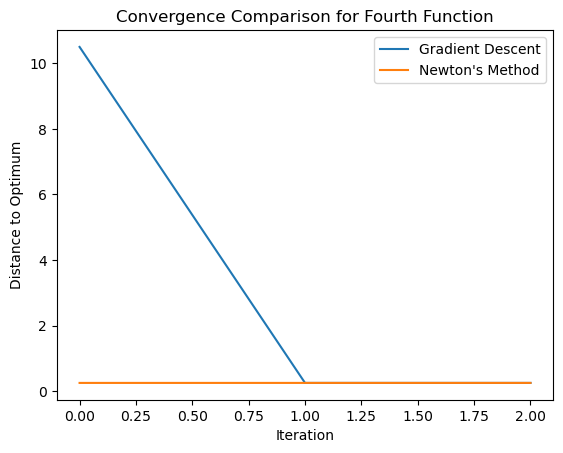

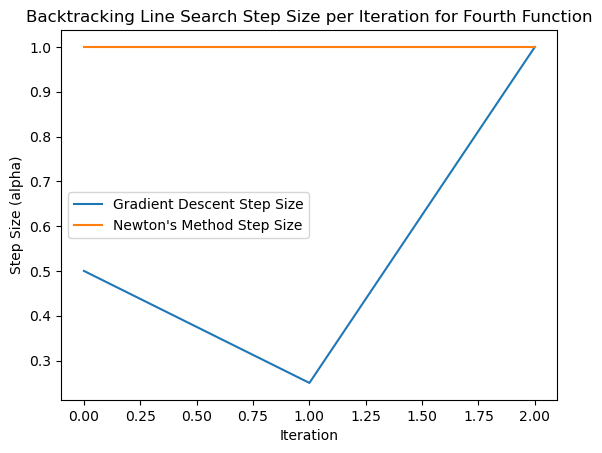

Gradient Descent Optimum: [0.   0.   0.25] Stopped after 3 iterations
Newton's Method Optimum: [-2.63081521e-12  1.31190177e-13  2.50000000e-01] Stopped after 3 iterations


In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Backtracking line search parameters
alpha, rho, c = 1.0, 0.5, 1e-4

# Define matrix A and vector b for the fourth function
A = np.array([[1, 1, 0], [1, 1, 0], [0, 0, 4]])
b = np.array([0, 0, 1])

# Define the function, gradient, and Hessian for the fourth function
def f4(x):
    return 0.5 * x.T @ A @ x - b.T @ x

def g4(x):
    return A @ x - b

def h4(x):
    return A  # Constant Hessian for this quadratic function

# Backtracking line search function (modified for vector input)
def line_search(x, p, grad, func):
    alpha_new = alpha
    while func(x + alpha_new * p) > func(x) + c * alpha_new * grad @ p:
        alpha_new *= rho
    return alpha_new

# Gradient Descent for the fourth function
def gradient_descent(func, grad, x0, tol=1e-6, max_iter=1000):
    x = x0
    optimum_distance = []
    steps = []
    for _ in range(max_iter):
        grad_x = grad(x)
        alpha_new = line_search(x, -grad_x, grad_x, func)
        x = x - alpha_new * grad_x
        distance_to_optimum = np.linalg.norm(x)  # Track distance to origin for simplicity
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Newton's Method for the fourth function with Hessian regularization
def newtons_method(func, grad, hess, x0, tol=1e-6, max_iter=1000):
    x = x0
    optimum_distance = []
    steps = []
    for _ in range(max_iter):
        grad_x = grad(x)
        hess_x = hess(x)
        eigvals = np.linalg.eigvals(np.array([[hess_x]]))  # Convert to 2D array for eigenvalue check
        if np.any(eigvals <= 0):
            hess_x = hess_x + 1e-4 * np.eye(len(x))  # Regularize Hessian to make it invertible
            
        step = np.linalg.solve(hess_x, -grad_x)
        alpha_new = line_search(x, step, grad_x, func)
        x = x + step * alpha_new
        distance_to_optimum = np.linalg.norm(x)  # Track distance to origin for simplicity
        optimum_distance.append(distance_to_optimum)
        steps.append(alpha_new)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, optimum_distance, steps

# Initial conditions and run the methods
x0 = np.array([-10, -10, -10])
gd_result, gd_optimum_distance, gd_steps = gradient_descent(f4, g4, x0)
newton_result, newton_optimum_distance, newton_steps = newtons_method(f4, g4, h4, x0)

# Print results and stopping criteria
print("Gradient Descent Optimum:", gd_result, "Stopped after", len(gd_optimum_distance), "iterations")
print("Newton's Method Optimum:", newton_result, "Stopped after", len(newton_optimum_distance), "iterations")


# Plotting convergence (distance to optimum)
plt.plot(gd_optimum_distance, label='Gradient Descent')
plt.plot(newton_optimum_distance, label='Newton\'s Method')
plt.xlabel('Iteration')
plt.ylabel('Distance to Optimum')
plt.legend()
plt.title('Convergence Comparison for Fourth Function')
plt.show()

# Plotting step sizes from backtracking line search
plt.plot(gd_steps, label='Gradient Descent Step Size')
plt.plot(newton_steps, label='Newton\'s Method Step Size')
plt.xlabel('Iteration')
plt.ylabel('Step Size (alpha)')
plt.legend()
plt.title('Backtracking Line Search Step Size per Iteration for Fourth Function')
plt.show()
